Emerging Technolgies Project 2020 - Steven Joyce -G00362012

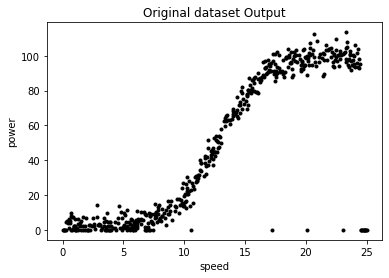

In [6]:
import pandas as pd
import numpy as np
import tensorflow
import tensorflow.keras as kr
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import scipy.spatial as spatial

# Reading in the csv file
dataset = pd.read_csv("powerproduction.csv")
dataset.head()
plt.title('Original dataset Output')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.');

In [7]:
train_data = dataset
distances = list()
i = 0
j = i + 1
for t in train_data.values:
    # compute distance between points at index i and j
    d = spatial.distance.pdist(np.array([train_data.values[i], train_data.values[j]]), 'euclidean')
    distances.append(d[0])
    # if j reaches last index - break
    if j == train_data['speed'].values.size - 1:
        break
    # increment index vals 
    i = i + 1
    j = i + 1
        
# calculate mean distance between points
avg_dist = np.mean(distances)
avg_dist

5.6731936201644775

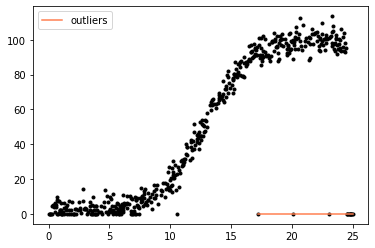

In [8]:
clustering = DBSCAN(eps=avg_dist, min_samples=15).fit(train_data)

# find outliers/anomolies (-1 denotes noisy data)
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# Retrieve outlier wind/speed data
outlierPoints = train_data.values[outliers]

plt.plot(train_data.values[:,0], train_data.values[:,1], 'k.')
plt.plot(outlierPoints[:,0], outlierPoints[:,1], color='coral', label='outliers')
plt.legend();

In [9]:
new_dataset = train_data.drop(outliers)

In [18]:
# Create a neural network with 1 neuron
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation = 'linear', kernel_initializer = 'ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')
# Train the neural network on our data.
model.fit(new_dataset['speed'], new_dataset['power'], epochs=500, batch_size=10);

Epoch 1/500
49/49 [==============================] - 0s 729us/step - loss: 2401.6233
Epoch 2/500
49/49 [==============================] - 0s 715us/step - loss: 2648.2932
Epoch 3/500
49/49 [==============================] - 0s 674us/step - loss: 2404.1831
Epoch 4/500
49/49 [==============================] - 0s 732us/step - loss: 2343.9964
Epoch 5/500
49/49 [==============================] - 0s 666us/step - loss: 2358.3347
Epoch 6/500
49/49 [==============================] - 0s 745us/step - loss: 2412.3589
Epoch 7/500
49/49 [==============================] - 0s 764us/step - loss: 2287.6417
Epoch 8/500
49/49 [==============================] - 0s 721us/step - loss: 2209.8545
Epoch 9/500
49/49 [==============================] - 0s 701us/step - loss: 2181.1867
Epoch 10/500
49/49 [==============================] - 0s 659us/step - loss: 2071.4744
Epoch 11/500
49/49 [==============================] - 0s 659us/step - loss: 1916.7085
Epoch 12/500
49/49 [==============================] - 0s 744us/

49/49 [==============================] - 0s 627us/step - loss: 291.0216
Epoch 99/500
49/49 [==============================] - 0s 618us/step - loss: 285.3450
Epoch 100/500
49/49 [==============================] - 0s 604us/step - loss: 281.7900
Epoch 101/500
49/49 [==============================] - 0s 604us/step - loss: 294.5059
Epoch 102/500
49/49 [==============================] - 0s 583us/step - loss: 296.2999
Epoch 103/500
49/49 [==============================] - 0s 604us/step - loss: 286.8281
Epoch 104/500
49/49 [==============================] - 0s 604us/step - loss: 286.8479
Epoch 105/500
49/49 [==============================] - 0s 583us/step - loss: 289.9936
Epoch 106/500
49/49 [==============================] - 0s 583us/step - loss: 296.5837
Epoch 107/500
49/49 [==============================] - 0s 604us/step - loss: 300.0948
Epoch 108/500
49/49 [==============================] - 0s 604us/step - loss: 286.9025
Epoch 109/500
49/49 [==============================] - 0s 631us/step 

49/49 [==============================] - 0s 725us/step - loss: 248.3477
Epoch 194/500
49/49 [==============================] - 0s 652us/step - loss: 254.8427
Epoch 195/500
49/49 [==============================] - 0s 658us/step - loss: 258.7250
Epoch 196/500
49/49 [==============================] - 0s 631us/step - loss: 253.2634
Epoch 197/500
49/49 [==============================] - 0s 583us/step - loss: 244.6970
Epoch 198/500
49/49 [==============================] - 0s 632us/step - loss: 237.7046
Epoch 199/500
49/49 [==============================] - 0s 622us/step - loss: 258.1824
Epoch 200/500
49/49 [==============================] - 0s 690us/step - loss: 244.9055
Epoch 201/500
49/49 [==============================] - 0s 604us/step - loss: 254.5486
Epoch 202/500
49/49 [==============================] - 0s 639us/step - loss: 249.8850
Epoch 203/500
49/49 [==============================] - 0s 647us/step - loss: 256.6824
Epoch 204/500
49/49 [==============================] - 0s 627us/step

49/49 [==============================] - 0s 628us/step - loss: 236.6642
Epoch 289/500
49/49 [==============================] - 0s 661us/step - loss: 221.6429
Epoch 290/500
49/49 [==============================] - 0s 646us/step - loss: 235.9972
Epoch 291/500
49/49 [==============================] - 0s 667us/step - loss: 230.4279
Epoch 292/500
49/49 [==============================] - 0s 915us/step - loss: 224.4025
Epoch 293/500
49/49 [==============================] - 0s 742us/step - loss: 218.9361
Epoch 294/500
49/49 [==============================] - 0s 691us/step - loss: 224.3608
Epoch 295/500
49/49 [==============================] - 0s 696us/step - loss: 215.2665
Epoch 296/500
49/49 [==============================] - 0s 709us/step - loss: 225.6129
Epoch 297/500
49/49 [==============================] - 0s 732us/step - loss: 219.8743
Epoch 298/500
49/49 [==============================] - 0s 705us/step - loss: 209.5320
Epoch 299/500
49/49 [==============================] - 0s 625us/step

49/49 [==============================] - 0s 761us/step - loss: 221.0847
Epoch 384/500
49/49 [==============================] - 0s 785us/step - loss: 191.1856
Epoch 385/500
49/49 [==============================] - 0s 664us/step - loss: 199.1952
Epoch 386/500
49/49 [==============================] - 0s 624us/step - loss: 227.3710
Epoch 387/500
49/49 [==============================] - 0s 640us/step - loss: 212.5678
Epoch 388/500
49/49 [==============================] - 0s 604us/step - loss: 204.5089
Epoch 389/500
49/49 [==============================] - 0s 563us/step - loss: 195.0143
Epoch 390/500
49/49 [==============================] - 0s 583us/step - loss: 211.8432
Epoch 391/500
49/49 [==============================] - 0s 583us/step - loss: 199.0515
Epoch 392/500
49/49 [==============================] - 0s 583us/step - loss: 217.7239
Epoch 393/500
49/49 [==============================] - 0s 596us/step - loss: 204.1651
Epoch 394/500
49/49 [==============================] - 0s 583us/step

49/49 [==============================] - 0s 679us/step - loss: 185.6472
Epoch 479/500
49/49 [==============================] - 0s 612us/step - loss: 182.4022
Epoch 480/500
49/49 [==============================] - 0s 589us/step - loss: 198.4894
Epoch 481/500
49/49 [==============================] - 0s 583us/step - loss: 198.1296
Epoch 482/500
49/49 [==============================] - 0s 583us/step - loss: 200.5566
Epoch 483/500
49/49 [==============================] - 0s 592us/step - loss: 188.4640
Epoch 484/500
49/49 [==============================] - 0s 595us/step - loss: 191.0547
Epoch 485/500
49/49 [==============================] - 0s 586us/step - loss: 194.7821
Epoch 486/500
49/49 [==============================] - 0s 593us/step - loss: 192.6904
Epoch 487/500
49/49 [==============================] - 0s 583us/step - loss: 209.5506
Epoch 488/500
49/49 [==============================] - 0s 600us/step - loss: 202.6871
Epoch 489/500
49/49 [==============================] - 0s 599us/step

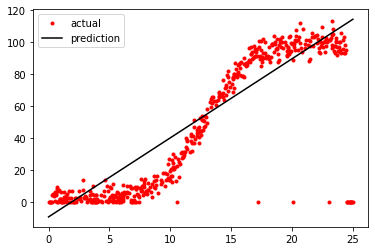

In [19]:
# Plot Model against dataset
plt.plot(dataset['speed'], dataset['power'], 'r.', label='actual')
plt.plot(dataset['speed'], model.predict(dataset['speed']), color='k', label='prediction')
plt.legend();

In [14]:
model.predict([22.311, 32.565, 13.652])

array([[83.322784],
       [99.87605 ],
       [38.859066]], dtype=float32)

In [15]:
model.evaluate(new_dataset['speed'], new_dataset['power'])

16/16 [==============================] - 0s 734us/step - loss: 18.3520


18.352001190185547

In [16]:
# Save model for server.py
model.save('datamodel.h5')